<h2>Installation</h2>

You will need to download and install the cartopy libraries before you are able to import them in Python. To do this, install Anaconda 3. Once you have done so, you will need to run this command: 

conda install -c conda-forge cartopy

If you are on Windows, you will want to run this command from the Windows Command Line as an administrator. This will install cartopy.

<h2>Imports</h2>

You will need to import the necessary tools to make maps using cartopy. You will need to import cartopy.crs and matplotlib.pyplot. It is most common to import them as ccrs and plt respectively. Whatever you import them as will affect what prefix you will need to use when calling their functions. 


In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

<h2>Axes</h2>

Next, you will need to create an axes. However, this isn’t referring to the typical definition of axes (as in x or y axis), but instead is something that is quite similar to a subplot. ax = plt.axes(projection=ccrs.SomeProjection()) will create an axes named ax with the projection given. Different projections will obviously result in different map projections, so choose wisely. A list of available projections can be found <a href="http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html">here.</a> This by itself will not create a map, but will form the basis for drawing one. To render a map of the chosen projection, you may either call ax.coastlines() for a black and white map with only coastlines outlined, or you may call ax.stock_img() for a colored, detailed geographical map.


In [2]:
#create map w/ plate carree projection and add in the geographical version of earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

<h2>Plotting Points/Lines</h2>

To plot a point on the map, you will need to use the plot function:
plt.plot(x, y, color=”color”,marker=”marker”, transform=ccrs.transform(), …)

To plot a line, you will need to give a list (or array) of x values ([x1, x2, x3, …]) and an equally sized list of y values ([y1, y2, y3, …]) in place of a single x and y value. The plot function will then plot all the points (x1, y1), (x2, y2), and so on and then connect them in order. Note that on cartopy maps, longitude and latitude serve as the coordinate system, with longitude serving as the x and latitude serving as the y. For example, plotting a point at your current longitude and latitude will place a dot on the map where you are in the world.
The plot function has a wide variety of parameters that allow you to achieve different appearances based on your needs. A full list of parameters may be found <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">here,</a> but detailed here are some of the more commonly used ones.
<ul>
    <li><b>color</b> – changes the color of the point you are marking.</li>
    <li><b>marker</b> – changes the style of the marker of the point you are plotting (i.e. “o” for circle, “.” for point, “x” for an x, and so on).</li>
    <li><b>label</b> – Used to label plotted points or lines for use with the plt.legend() function. Does not place the given label near the point or line like one might expect.</li>
    <li><b>linestyle</b> – used to change the look of the line connecting points. Some examples include “dashed”, “dashdot”, and “dotted”. Defaults to “solid”.</li>
    <li><b>linewidth</b> – a float value used to change the width of the line connecting two points.</li>
    <li><b>transform</b> – Assigns a certain transformation on a line. For use with cartopy, you can apply transformations based off map projections (a full list of which may be found <a href="http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html">here</a>). For example, a Geodetic transformation causes what is normally a straight line to become an arc. This is because the geodetic transform causes the line to use a spherical coordinate system to better reflect a true path between the two points on the actual globe. Note that some transforms can also cause a line to connect from point A to point B by going off one side of the map and coming out the other, as certain transforms wish to choose the true shortest path between the two points. An example of this is shown at the bottom of this guide, where the same two points are connected with two different lines, with the blue line having transform=ccrs.Geodetic() and the magenta line having transform=ccrs.PlateCarree()</li>
</ul>


In [3]:
#coordinates of New Haven and Beijing
here_lon, here_lat = -72.927884, 41.308274
beij_lon, beij_lat = 116.407396, 39.904200

#place a line between new haven and Beijing, marking the two places with a circle (marker = “o”). Geodetic transform causes it to take a “spherical” path and the shortest path between the two places
plt.plot([beij_lon, here_lon],[beij_lat, here_lat],color="blue",marker="o",transform=ccrs.Geodetic(), linewidth=3)
#places a dotted line between New Haven and Beijing, with a Plate Carree transform which more or less changes nothing. Notice how it heads east instead of west like in the Geodetic transform.
plt.plot([here_lon, beij_lon],[here_lat, beij_lat],color="magenta",linestyle="--",transform=ccrs.PlateCarree())
#an example of a dot
plt.plot(24,69,label="label",color="yellow",marker="o")


<h2>Annotations</h2>

You may also place annotations and text onto your cartopy map. You may place an annotation using plt.annotate(string, xy=(x,y), xytext=(x, y), arrowprops=dict(arrowstyle=”style”, connectionstyle=”style”, etc…)). Full documentation of the annotation command may be found <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate">here.</a>
<ul>
    <li><b>string</b> – the annotation’s text.</li>
    <li><b>xy</b> – formatted as (xcoord, ycoord) when given to the function. It is the position of where the annotation points to.</li>
    <li><b>xytext</b> – formatted as (xcoord, ycoord) when given to the function. It is the position of the annotation’s string field.</li>
    <li><b>arrowprops</b> – a dictionary of arrow properties such as the style of the arrow, width of the arrow, and more. By default arrowprops is None, and when it is None no arrow appears.</li>


In [4]:
#create an annotation pointing to new haven saying you are here
plt.annotate("you are here", xy=(here_lon, here_lat), xytext=(here_lon - 60, here_lat - 30),arrowprops=dict(width=1))


<h2>Text</h2>

Alternatively, you may use the text function if an arrow is not required. To may place text using plt.text(x, y, string). Extra parameters governing alignment, size, font, and other text properties may be given as well by providing the fontdict paramater as a dictionary of property settings. Full documentation of this function may be found <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.text">here</a> and a full list of fontdict properties can be found <a href="https://matplotlib.org/api/text_api.html#matplotlib.text.Text">here.</a>
<ul>
    <li><b>x, y</b> – where on the map to place the text given</li>
    <li><b>string</b> - the string displayed</li>
</ul>

In [5]:
#place text near Beijing saying ‘you want to go here’
plt.text(beij_lon + 3, beij_lat - 12, "You want to go here", fontdict=dict(color="cyan"))

#place tilted text near the yellow dot
plt.text(27, 72, "Hey, a yellow dot", fontdict=dict(rotation=10))

<h2>Displaying your map</h2>

Finally, call plt.show to display your map.

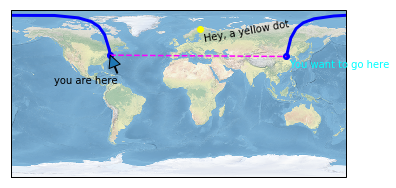

In [6]:
plt.show()